In [2]:
import json
import argparse
from pprint import pprint
import random
import numpy as np
import re

from collections import Counter

import spacy
from spacy.lang.en.stop_words import STOP_WORDS

In [3]:
train_file_A = '../raw-datasets/naps/naps.trainA.1.0.jsonl' # 5.9G
train_file_B = '../raw-datasets/naps/naps.trainB.1.0.jsonl'
test_file = '../raw-datasets/naps/naps.test.1.0.jsonl'

In [4]:
def get_by_key(example, key):
    if isinstance(example[key], str):
        ch = " " if key in ['text', 'code_sequence'] else ""
        return ch.join(example[key])
    else:
        return example[key]

def get_all_by_key(data, key):
    return [get_by_key(d, key) for d in data]

In [5]:
train_data = [
    dict(json.loads(l)) for l in [l.strip() for l in open(train_file_B, "rt").readlines()]
]
test_data = [
    dict(json.loads(l)) for l in [l.strip() for l in open(test_file, "rt").readlines()]
]

keys = list(train_data[0].keys())
print(keys)

['solution_id', 'problem_id', 'is_train', 'return_type', 'url', 'is_partial', 'passes_tests', 'entry_id', 'code_sequence', 'tests', 'text', 'language', 'args', 'code_tree']


In [6]:
idx = random.randint(0, len(train_data))
all_texts = [' '.join(get_by_key(train_data[i], key='text')) for i in range(len(train_data))]

print(all_texts[187])
# for i, t in enumerate(all_texts):
#     if 'plu' in t:
#         print(i)
#         print("---")

you are given an array of numbers var2 ( indexing is 0 - based ) , an array of numbers var3 ( indexing is 0 - based ) and an array of numbers var4 ( indexing is 0 - based ) . you have to set var8 to zero and var6 to the length of var2 . for each var5 between 1 and var6 you have to set _ _ globals _ _ . main . input [ var5 ] to var2 [ var5 - 1 ] . for each var5 between 1 and var6 you have to set _ _ globals _ _ . main . sum [ var5 ] to _ _ globals _ _ . main . sum [ var5 - 1 ] plus _ _ globals _ _ . main . input [ var5 ] . for each var5 in var3 you have to set var9 to var3 [ var5 ] and var10 to var4 [ var5 ] , you have to set var11 to _ _ globals _ _ . main . sum [ var10 ] - _ _ globals _ _ . main . sum [ var9 - 1 ] , and if var11 is greater than zero you have to add var11 to var8 . you have to return var8 .


## Check vocabulary

vocab length: 665


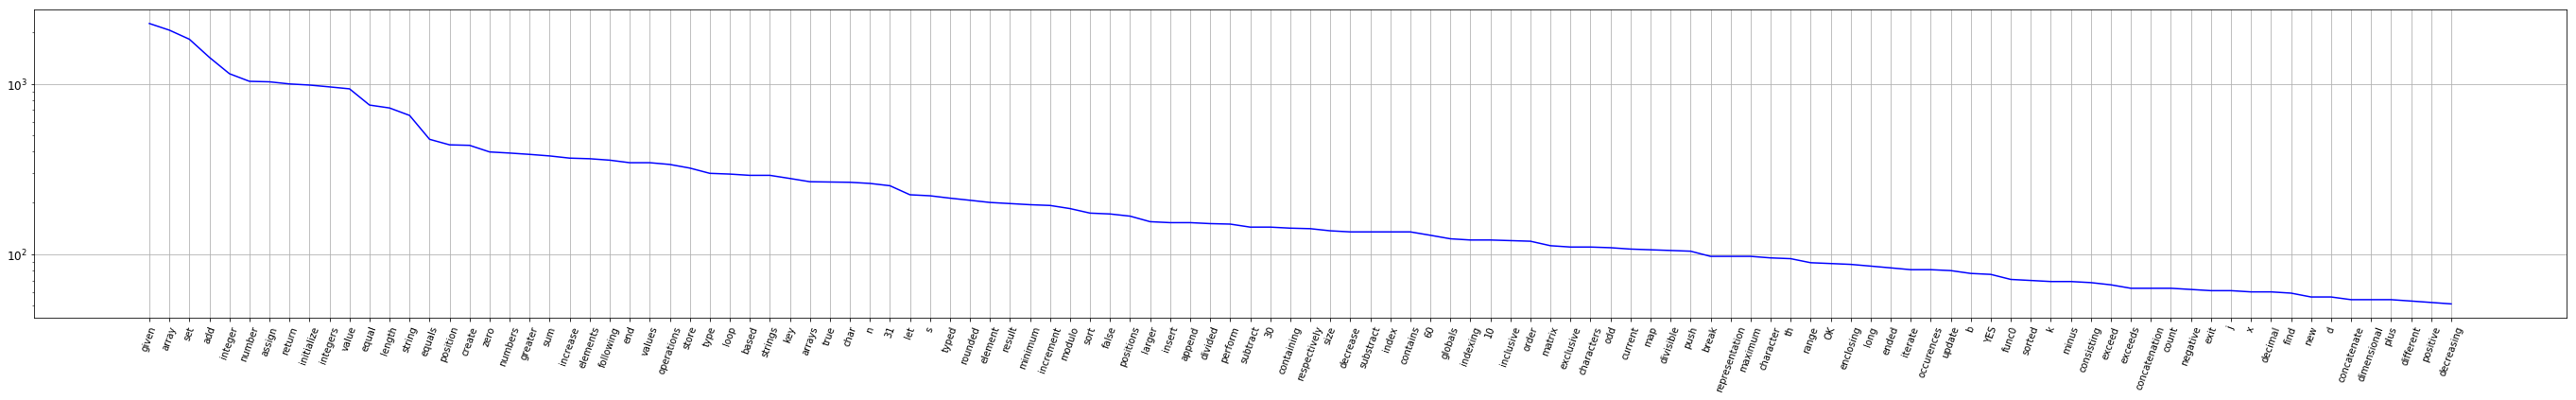

In [7]:
def update(vocab, xs):
    for x in xs:
        vocab[x] += 1
    return vocab

def clean(word):
    word = word.lower()
    b1 = re.match(r'[^a-z]$', word)
    b2 = re.match(r'^var[0-9]+', word)
    b3 = word in STOP_WORDS
    return b1 is None and b2 is None and not b3

vocabulary = Counter()
for i in range(len(train_data)):
    update(
        vocabulary, 
        list(
            map(lambda w : w, filter(clean, get_by_key(train_data[i], key='text')))
        )
    )

print(f"vocab length: {len(vocabulary)}")
    
pred = lambda x : x > 50
labels, values = zip(*filter(lambda p : pred(p[1]), vocabulary.most_common()))

plt.figure(figsize=(48,6))
plt.xticks(range(len(values)), labels, rotation=70, fontsize=10)
plt.yticks(fontsize=12)
plt.yscale('log')
plt.plot(range(len(values)), values, 'b-')
plt.grid()
plt.show()